# Example of Data Visualization and Analysis in Jupyter Notebook with Julia

**Abstract**

 The Julia programming language can be used to produced high quality plots with ease. In the example here we define, plot and fit a Voltage v. Current series with just 5 lines of code. For a genera introduction to Jupyter notebooks the accompanying "Jupyter Notebooks" notebook.


**Initialization**

We start by initializing standard `Plots` libraries (in Julia parlance ***packages***)

In [24]:
using Plots; using StatsPlots

**Data Entry**

In this example we want to measured currents as function of the input voltage in the circuit. For example, we measure between 0.5 and 5 V in 0.5 V increments. Inserting values by hand would look like this:

In [25]:
#Voltage entries
v = [0.5,
     1.0,
     1.5,
     2.0,
     2.5,
     3.0,
     3.5,
     4.0,
     4.5,
     5.0]

10-element Vector{Float64}:
 0.5
 1.0
 1.5
 2.0
 2.5
 3.0
 3.5
 4.0
 4.5
 5.0

In [26]:
#Current measurements
i =[0.048,
    0.105,
    0.153,
    0.201,
    0.247,
    0.312,
    0.348,
    0.401,
    0.445,
    0.501]

10-element Vector{Float64}:
 0.048
 0.105
 0.153
 0.201
 0.247
 0.312
 0.348
 0.401
 0.445
 0.501

**Plotting Data**

Julia makes it very easy to plot numerical evaluations using the `plot` function. This would result in a single line graph. However, for experimental data we want to represent each measurement with a point using the `scatter` function.

Plot properties can be directly inserted in the `scatter` command, so have fun with markers shapes, colors and sizes!

Plotting the voltage as a function of the current then looks like this


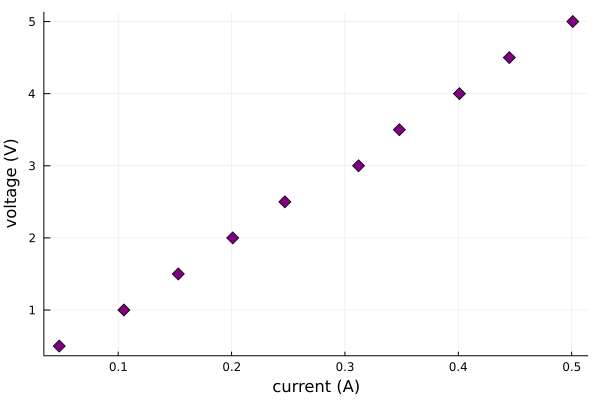

In [27]:
scatter(i,v,label=false,xlabel="current (A)",ylabel="voltage (V)", markersize=6,markershape=:diamond,markercolor=:purple )

**Determining the circuit resistor**

Now that we have both the data set and we can graph it all is left is to determine the circuit resistor value $R$. From Ohm's law:

$V=I•R$

therefore a simple linear regresion of the data series above will return the value of the resistor. Linear regresions are directly supported by the `Polynomials` package.

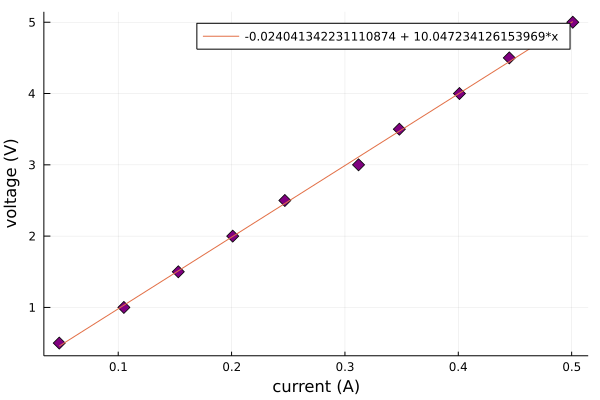

In [28]:
using Polynomials
fV=fit(i,v,1)
plot!(fV, extrema(i)...)